In [48]:
# Importing modules used in the lecture
import numpy as np
from numpy import cos, sin, tan, pi, exp
import matplotlib.pyplot as plt
import scipy.signal as sig
from IPython.display import Audio

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib inline

# Minimum Mean Square Error Illustration

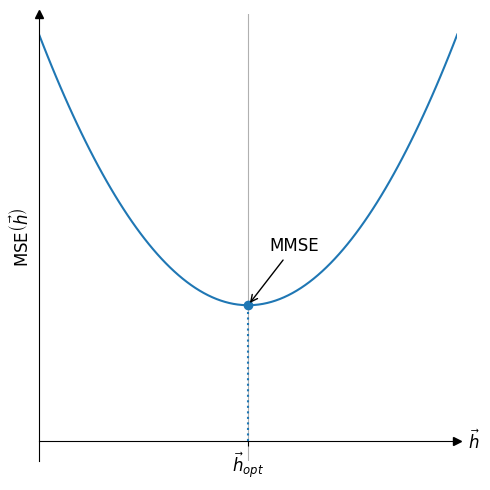

In [55]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5,5))
ax = fig.subplots()
# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Create axis arrows
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


x = np.linspace(-0, 2., 100)
ax.plot(x, (x-1)**2+0.5)
ax.plot([1,1],[0, 0.5], color="tab:blue", linestyle=":")
ax.plot([1],[0.5], color="tab:blue", marker="o")
plt.yticks([])
plt.xticks([1],["$\\vec{h}_{opt}$"], fontsize=12)
ax.set_ylabel("$\\text{MSE}\\left(\\vec{h}\\right)$", fontsize=12)


# Annotate the marker with "MMSE"
ax.annotate("MMSE", xy=(1, 0.5), xytext=(1.1, 0.7),
            textcoords='data', fontsize=12, color='k',
            arrowprops=dict(arrowstyle="->", color='k'))

#plt.xlabel("h", loc="right")
# Set axis labels at the end of arrows
ax.text(ax.get_xlim()[1]*1.04, -ax.get_ylim()[1]*.02, '$\\vec{h}$', fontsize=12, ha='center')
#ax.text(0, ax.get_ylim()[1]*1.05, r'$e$', fontsize=12, va='center')

plt.savefig("MMSE.svg")
plt.show()

## Predictor example

C:\Users\kaierih\AppData\Local\Temp\ipykernel_18292\3216801169.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(xticklabels)
C:\Users\kaierih\AppData\Local\Temp\ipykernel_18292\3216801169.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(yticklabels)


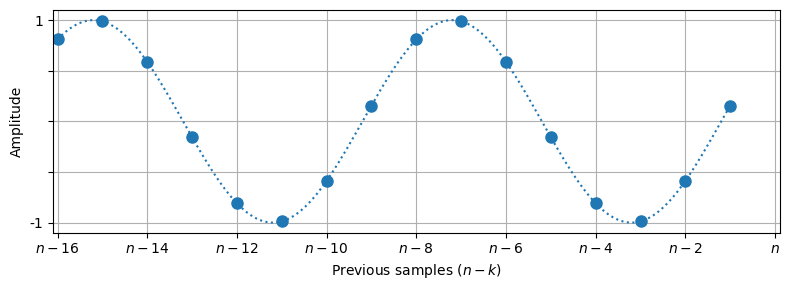

In [54]:
n = np.arange(-16, 0)
t = np.linspace(-16, -1, 501)
x = cos(pi/4*n - pi/5)
plt.figure(figsize=(8,3))
plt.plot(n, x, 'o', markersize=8)
plt.plot(t, cos(pi/4*t - pi/5), ':C0')
plt.xlim([-16.1, 0.1])
xticks = plt.gca().get_xticks()
xticklabels = [f"$n{x:.0f}$" for x in xticks]
xticklabels[-2] = "$n$"
#xticklabels = ["n" + x for x in xticklabels]
plt.gca().set_xticklabels(xticklabels)

yticks = plt.gca().get_yticks()
yticklabels = [""]*len(yticks)
yticklabels[1] = "-1"
yticklabels[-2] = "1"
plt.gca().set_yticklabels(yticklabels)

plt.xlabel("Previous samples ($n-k$)")
plt.ylabel("Amplitude")
plt.savefig("prediction_example.svg")
plt.show()

# Circuit Diagram

In [1]:
%load_ext jupyter_tikz

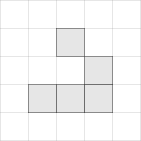

In [3]:
%%tikz
\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
    \draw[fill=black!10] (1, 1) rectangle (2, 2);
    \draw[fill=black!10] (2, 1) rectangle (3, 2);
    \draw[fill=black!10] (3, 1) rectangle (4, 2);
    \draw[fill=black!10] (3, 2) rectangle (4, 3);
    \draw[fill=black!10] (2, 3) rectangle (3, 4);
\end{tikzpicture}

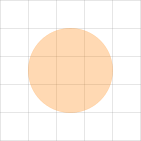

In [2]:
from jupyter_tikz import TexFragment

tikz_code = tex_template_code = r"""\begin{tikzpicture}
    \draw[help lines] grid (5, 5);
     \filldraw [color=orange, opacity=0.3] (2.5,2.5) circle (1.5);
\end{tikzpicture}"""

tikz = TexFragment(tikz_code)  # Create the tex template object

tikz.run_latex()  # Run LaTeX and shows the output

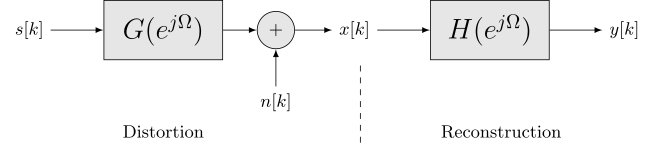

In [3]:
%%tikz -p=\include{prefix.tex} -sc=2 -S wiener_filter.svg
\begin{tikzpicture}[auto, node distance=2cm]
    \node [input, name=input] {};
    \node [block, right of=input,yshift=0cm] (system){\Large $G(e^{j \Omega})$};
    \node [sum,right of=system, xshift=1cm] (sum){$+$};
    \node [input, below of=sum,yshift=1cm] (noise) {};
    \node [input, right of=sum, xshift=-1cm] (observation1) {};
    \node [input, right of=observation1, xshift=-1.2cm] (observation) {};
    \node [block, right of=observation,yshift=0cm] (filter){\Large $H(e^{j \Omega})$};
    \node [output, right of=filter,xshift=0cm] (output) {};
    
    \draw [-latex] (input) node[left]{$s[k]$}  -- (system);
    \draw [-latex] (system)  -- (sum);
    \draw [-latex] (sum)  -- (observation1) node[right]{$x[k]$};
    \draw [-latex] (observation) -- (filter);
    \draw [-latex] (filter)  -- (output) node[right]{$y[k]$};
    \draw [-latex] (noise) node[below]{$n[k]$} -- (sum);

    \draw [draw, dashed] (5.5, -2.0) -- (5.5, -.55);
    \node at (2, -1.8) {Distortion};
    \node at (8, -1.8) {Reconstruction};

\end{tikzpicture}


# Signal distortion model

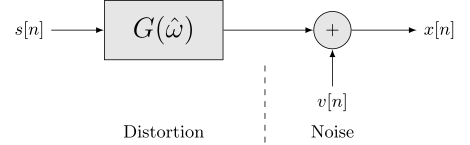

In [4]:
%%tikz -p=\include{prefix.tex} -sc=2 -S distortion.svg
\begin{tikzpicture}[auto, node distance=2cm]
    \node [input, name=input] {};
    \node [block, right of=input,yshift=0cm] (system){\Large $G(\hat{\omega})$};
    \node [sum,right of=system, xshift=2cm] (sum){$+$};
    \node [input, below of=sum,yshift=1cm] (noise) {};
    \node [output, right of=sum, xshift=-0.5cm] (output) {};
    
    \draw [-latex] (input) node[left]{$s[n]$}  -- (system);
    \draw [-latex] (system)  -- (sum);
    \draw [-latex] (sum)  -- (output) node[right]{$x[n]$};
    \draw [-latex] (noise) node[below]{$v[n]$} -- (sum);

    \draw [draw, dashed] (3.8, -2.0) -- (3.8, -.55);
    \node at (2, -1.8) {Distortion};
    \node at (5, -1.8) {Noise};

\end{tikzpicture}


# Wiener filter setup

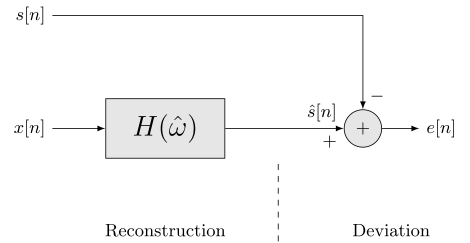

In [5]:
%%tikz -p=\include{prefix.tex} -sc=2 -S wiener.svg
\begin{tikzpicture}[auto, node distance=2cm]
                        
    \node [input, name=input] {};
    \node [input, above of=input, yshift=0cm] (source){};
    \node [block, right of=input,yshift=0cm] (filter){\Large $H(\hat{\omega})$};
    \node [sum, right of=filter, xshift=2.5cm](error_sum){$+$};
    \node [output, right of=error_sum,xshift=-1cm] (output) {};

    \draw [->] (source) node[left]{$s[n]$} -| (error_sum.north) node[above right]{$-$};
    \draw [-latex] (input) node[left]{$x[n]$} -- (filter);
    \draw [->] (filter) -- (error_sum.west) node[above left]{$\hat{s}[n]$} node[below left]{$+$};
    \draw [-latex] (error_sum)  -- (output) node[right]{$e[n]$};

    \draw [draw, dashed] (4, -2.0) -- (4, -.55);

    \node at (2, -1.8) {Reconstruction};
    \node at (6, -1.8) {Deviation};

\end{tikzpicture}

# Adaptive filter concept

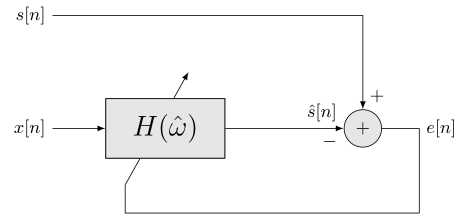

In [59]:
%%tikz -p=\include{prefix.tex} -sc=2 -S adaptive_filter.svg
\begin{tikzpicture}[auto, node distance=2cm]
                        
    \node [input, name=input] {};
    \node [input, above of=input, yshift=0cm] (source){};
    \node [block, right of=input,yshift=0cm] (filter){\Large $H(\hat{\omega})$};
    \node [sum, right of=filter, xshift=2.5cm](error_sum){$+$};
    \node [output, right of=error_sum,xshift=-1cm] (output) {};
    \node at ($(output.center)-(0,1.5)$) (branch_1) {};
    \node at ($(filter.west)-(-0.35,1.0)$) (branch_2) {};
    \node at ($(filter.east)-(0.65,-1.0)$) (branch_3) {};

    \draw [->] (source) node[left]{$s[n]$} -| (error_sum.north) node[above right]{$+$};
    \draw [-latex] (input) node[left]{$x[n]$} -- (filter);
    \draw [->] (filter) -- (error_sum.west) node[above left]{$\hat{s}[n]$} node[below left]{$-$};
    \draw [-] (error_sum)  -- (output) node[right]{$e[n]$};
    \draw [-] (output) -- (branch_1.center) -| (branch_2.center);
    \draw [->] (branch_2.center) -- (branch_3.center);
    \node [block, right of=input,yshift=0cm] (filter){\Large $H(\hat{\omega})$};

\end{tikzpicture}

# Adaptive prediction

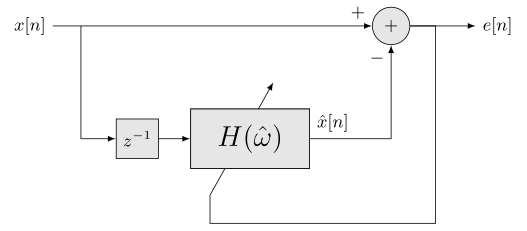

In [58]:
%%tikz -p=\include{prefix.tex} -sc=2 -S prediction.svg
\begin{tikzpicture}[auto, node distance=2cm]
                        
    \node [input, name=input] {};
    \node at ($(input.east)-(-0.5,0)$) (input_branch) {};
    \node [block, right of=input, minimum width=5mm, minimum height=7mm, yshift=-2cm, xshift=-0.5cm] (delay){$z^{-1}$};
    \node [block, right of=delay, yshift=0cm] (filter){\Large $H(\hat{\omega})$};
    \node [sum, right of=input, xshift=5cm](error_sum){$+$};
    \node [output, right of=error_sum,xshift=-0.5cm] (output) {};
                            
    \node at ($(filter.west)-(-0.35,1.5)$)  (branch_2) {};
    \node at ($(filter.west)-(-0.35,1.0)$) (branch_3) {};
    \node at ($(filter.east)-(0.65,-1.0)$) (branch_4) {};
    \node at ($(branch_2)-(-4,0)$) (branch_1) {};

    \draw [->] (input) node[left]{$x[n]$} -- (error_sum.west) node[above left]{$+$};
    \draw [->] (input_branch.center) |- (delay);
    \draw [->] (delay) -- (filter);
    \draw [->] (filter.east) node[above right]{$\hat{x}[n]$} -| (error_sum.south) node[below left]{$-$};
    \draw [->] (error_sum)  -- (output) node[right]{$e[n]$};
    \draw [-] (error_sum.east) -| (branch_1.center) -| (branch_2.center) -- (branch_3.center);
    \draw [->] (branch_3.center) -- (branch_4.center);
    %\draw [->] (filter.east) -- (pred_out) node[right]{$y[n]$};
    \node [block, right of=delay, yshift=0cm] (filter){\Large $H(\hat{\omega})$};


\end{tikzpicture}

# Adaptive noise cancelling

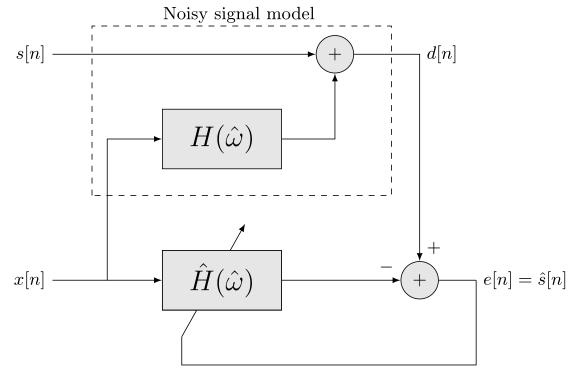

In [68]:
%%tikz -p=\include{prefix.tex} -sc=2 -S adaptive_nc.svg
\begin{tikzpicture}[auto, node distance=2cm]
                        
    \node [input, name=input] {};
    \node [input, above of=input, yshift=2cm] (source){};
    \node [sum, right of=source, xshift=4cm](sum1){$+$};
    \node [block, right of=input,xshift=1cm] (filter){\Large $H(\hat{\omega})$};
    \node [sum, right of=filter, xshift=2.5cm](error_sum){$+$};
    \node [output, right of=error_sum,xshift=-1cm] (output) {};
    \node at ($(output.center)-(0,1.5)$) (branch_1) {};
    \node at ($(filter.west)-(-0.35,1.0)$) (branch_2) {};
    \node at ($(filter.east)-(0.65,-1.0)$) (branch_3) {};
    \node [block, above of=filter, yshift=0.5cm](sys1){\Large $H(\hat{\omega})$};

    \draw [->] (source) node[left]{$s[n]$} -- (sum1.west);
    \draw [-latex] (input) node[left]{$x[n]$} -- (filter) node[midway](branch1){};
    \draw [->] (branch1.south) |- (sys1);
    \draw [->] (sys1) -| (sum1.south);
    \draw [->] (sum1.east) -| (error_sum.north) node[midway](){$d[n]$} node[above right](){$+$};
    \draw [->] (filter) -- (error_sum.west) node[above left]{$-$};
    \draw [-] (error_sum)  -- (output) node[right]{$e[n] = \hat{s}[n]$};
    \draw [-] (output) -- (branch_1.center) -| (branch_2.center);
    \draw [->] (branch_2.center) -- (branch_3.center);
    \node [block, right of=input,xshift=1cm] (filter){\Large $\hat{H}(\hat{\omega})$};
    \draw[dashed] (0.7,1.5) rectangle (6,4.5);
    \node at (3.3, 4.7) {Noisy signal model};

\end{tikzpicture}

# LMS prediction flowchart

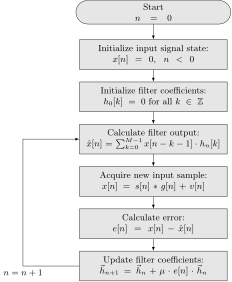

In [10]:
%%tikz -p=\include{prefix.tex} -sc=1 -S prediction_flowchart.svg
\begin{tikzpicture}[auto, node distance=1.5cm]
                        
    \node [draw, rounded rectangle, fill=gray!20, name=input, minimum width=20mm, minimum height=7mm, text width=5cm, align=center] {Start\\ $n=0$};
    \node [block, below of=input, text width=5cm, align=center] (signal_init) {Initialize input signal state: \\$x[n] = 0, \ \ n<0$};
    \node [block, below of=signal_init, text width=5cm, align=center] (filter_init) {Initialize filter coefficients: \\$h_0[k] = 0 \text{ for all } k \in \mathbb{Z}$};
    \node [block, below of=filter_init, text width=5cm, align=center] (filter_output) {Calculate filter output: \\$\hat{x}[n]=\sum_{k=0}^{M-1}x[n-k-1]\cdot h_n[k]$};
    \node [block, below of=filter_output, text width=5cm, align=center] (get_sample) {Acquire new input sample: \\$x[n] = s[n]*g[n]+v[n]$};
    \node [block, below of=get_sample, text width=5cm, align=center] (get_error) {Calculate error: \\$e[n]=x[n] - \hat{x}[n]$};
    \node [block, below of=get_error, text width=5cm, align=center] (update_filter) {Update filter coefficients: \\$\vec{h}_{n+1}=\vec{h}_n  + \mu \cdot e[n] \cdot \vec{h}_n$};
    \node at ($(update_filter.west)-(2, 0)$) (feedback) {};


    \draw [->] (input) -- (signal_init);
    \draw [->] (signal_init) -- (filter_init);
    \draw [->] (filter_init) -- (filter_output);
    \draw [->] (filter_output) -- (get_sample);
    \draw [->] (get_sample) -- (get_error);
    \draw [->] (get_error) -- (update_filter);
    \draw [->] (update_filter.west) -- (feedback.center) node[below]{$n = n+1$} |- (filter_output.west);

\end{tikzpicture}

# LMS prediction flowchart

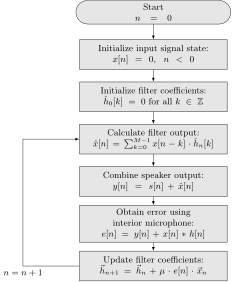

In [72]:
%%tikz -p=\include{prefix.tex} -sc=1 -S nc_flowchart.svg
\begin{tikzpicture}[auto, node distance=1.5cm]
                        
    \node [draw, rounded rectangle, fill=gray!20, name=input, minimum width=20mm, minimum height=7mm, text width=5cm, align=center] {Start\\ $n=0$};
    \node [block, below of=input, text width=5cm, align=center] (signal_init) {Initialize input signal state: \\$x[n] = 0, \ \ n<0$};
    \node [block, below of=signal_init, text width=5cm, align=center] (filter_init) {Initialize filter coefficients: \\$\hat{h}_0[k] = 0 \text{ for all } k \in \mathbb{Z}$};
    \node [block, below of=filter_init, text width=5cm, align=center] (filter_output) {Calculate filter output: \\$\hat{x}[n]=\sum_{k=0}^{M-1}x[n-k]\cdot \hat{h}_n[k]$};
    \node [block, below of=filter_output, text width=5cm, align=center] (get_sample) {Combine speaker output: \\$y[n] = s[n]+\hat{x}[n]$};
    \node [block, below of=get_sample, text width=5cm, align=center] (get_error) {Obtain error using \\ interior microphone: \\$e[n] = y[n] + x[n]*h[n]$};
    \node [block, below of=get_error, text width=5cm, align=center] (update_filter) {Update filter coefficients: \\$\vec{h}_{n+1}=\vec{h}_n  + \mu \cdot e[n] \cdot \vec{x}_n$};
    \node at ($(update_filter.west)-(2, 0)$) (feedback) {};


    \draw [->] (input) -- (signal_init);
    \draw [->] (signal_init) -- (filter_init);
    \draw [->] (filter_init) -- (filter_output);
    \draw [->] (filter_output) -- (get_sample);
    \draw [->] (get_sample) -- (get_error);
    \draw [->] (get_error) -- (update_filter);
    \draw [->] (update_filter.west) -- (feedback.center) node[below]{$n = n+1$} |- (filter_output.west);

\end{tikzpicture}